## Problem Statement
To predict the wine quatlity into LOW , MEDIUM or HIGH.

### Data Dictionary
- Target : 2 = HIGH (Quality = 8 or 9), 1 = MEDIUM (Quality = 6 or 7), 0 = LOW (the rest) 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Preprocessing Data 

In [75]:
# importing the wineQualityWhites dataset with pandas
df = pd.read_csv('wineQualityWhites.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [76]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

**Drop id feature which is not meaningful for analysis.** 

In [77]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
# df.head()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed.acidity           4898 non-null float64
volatile.acidity        4898 non-null float64
citric.acid             4898 non-null float64
residual.sugar          4898 non-null float64
chlorides               4898 non-null float64
free.sulfur.dioxide     4898 non-null float64
total.sulfur.dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [81]:
def myfun(num):
    if num >= 7:
        return 2
    elif num > 5:
        return 1 
    else:
        return 0

In [82]:
df["target"] = df["quality"].apply(myfun)

In [83]:
df["target"].value_counts()

1    2198
0    1640
2    1060
Name: target, dtype: int64

In [84]:
df = df.drop(df.query('target == 1').sample(frac = 0.5).index)

In [85]:
df["target"].value_counts()

0    1640
1    1099
2    1060
Name: target, dtype: int64

In [42]:
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,target
fixed.acidity,1.000000,-0.017678,0.296699,0.100838,0.022705,-0.062334,0.085836,0.281708,-0.441117,-0.028636,-0.139380,-0.128268,-0.116258
volatile.acidity,-0.017678,1.000000,-0.154755,0.049888,0.083050,-0.110104,0.080058,0.026917,-0.024766,-0.020764,0.063971,-0.204600,-0.190349
citric.acid,0.296699,-0.154755,1.000000,0.118084,0.116644,0.105483,0.128455,0.174329,-0.179168,0.064520,-0.096228,-0.011385,-0.024162
residual.sugar,0.100838,0.049888,0.118084,1.000000,0.093662,0.296133,0.416324,0.838406,-0.197122,-0.017671,-0.450132,-0.109029,-0.140585
chlorides,0.022705,0.083050,0.116644,0.093662,1.000000,0.087720,0.200554,0.262820,-0.104826,0.023743,-0.365204,-0.225507,-0.237642
free.sulfur.dioxide,-0.062334,-0.110104,0.105483,0.296133,0.087720,1.000000,0.623466,0.278794,0.001901,0.074506,-0.233299,0.009248,-0.015229
total.sulfur.dioxide,0.085836,0.080058,0.128455,0.416324,0.200554,0.623466,1.000000,0.538055,-0.009614,0.132380,-0.459396,-0.195553,-0.225345
density,0.281708,0.026917,0.174329,0.838406,0.262820,0.278794,0.538055,1.000000,-0.112806,0.065206,-0.780134,-0.342214,-0.370620
pH,-0.441117,-0.024766,-0.179168,-0.197122,-0.104826,0.001901,-0.009614,-0.112806,1.000000,0.146015,0.142734,0.111445,0.119245
sulphates,-0.028636,-0.020764,0.064520,-0.017671,0.023743,0.074506,0.132380,0.065206,0.146015,1.000000,0.003173,0.060193,0.067333


In [43]:
# df.drop(['citric.acid'],axis=1,inplace=True)
# df.drop(['free.sulfur.dioxide'],axis=1,inplace=True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3799 entries, 2 to 4897
Data columns (total 13 columns):
fixed.acidity           3799 non-null float64
volatile.acidity        3799 non-null float64
citric.acid             3799 non-null float64
residual.sugar          3799 non-null float64
chlorides               3799 non-null float64
free.sulfur.dioxide     3799 non-null float64
total.sulfur.dioxide    3799 non-null float64
density                 3799 non-null float64
pH                      3799 non-null float64
sulphates               3799 non-null float64
alcohol                 3799 non-null float64
quality                 3799 non-null int64
target                  3799 non-null int64
dtypes: float64(11), int64(2)
memory usage: 415.5 KB


In [45]:
from sklearn.preprocessing import StandardScaler
features = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values



# KMeans Without PCA

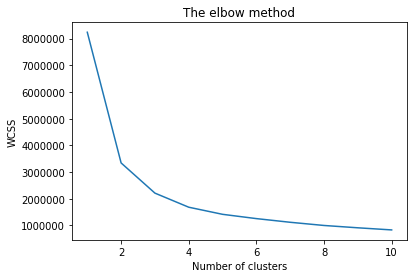

In [46]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [47]:
km = KMeans(n_clusters = 3 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_km= km.fit_predict(x)


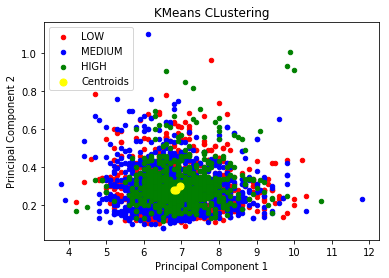

In [48]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 20, c = 'red', label = 'LOW')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 20, c = 'blue', label = 'MEDIUM')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 20, c = 'green', label = 'HIGH')


#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
#print (df.columns)
plt.title('KMeans CLustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend()
plt.show()

## K-Means Clustering with PCA

**Performing 2D Principal Component Analysis(PCA)**

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


pca_x = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_x
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-41.666127,6.201612
1,48.575774,-1.543468
2,-41.666127,6.201612
3,-4.163946,-4.354422
4,33.258186,0.920381


In [50]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-41.666127,6.201612,NaN
1,48.575774,-1.543468,NaN
2,-41.666127,6.201612,1.0
3,-4.163946,-4.354422,1.0
4,33.258186,0.920381,NaN


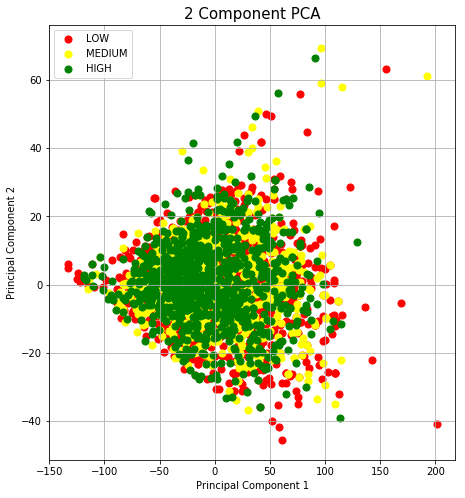

In [51]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 10)
ax1.set_ylabel('Principal Component 2', fontsize = 10)
ax1.set_title('2 Component PCA', fontsize = 15)


targets = [0,1,2]
i=0
colors = ["red","yellow","green"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    i=i+1
ax1.legend(["LOW","MEDIUM","HIGH"])
ax1.grid()

#### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components. 
Together, the first two principal components contain 98.89% of the information. The first principal component contains 90.96% of the variance and the second principal component contains 7.9% of the variance. 

In [52]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.90874247 0.08053283]
0.9892753013274603


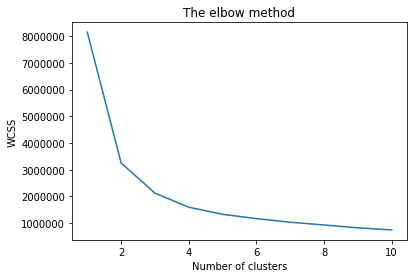

In [53]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [54]:
km_pca = KMeans(n_clusters = 3 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_km_pca = km_pca.fit_predict(principalDf)

In [55]:
principalDf=principalDf.values

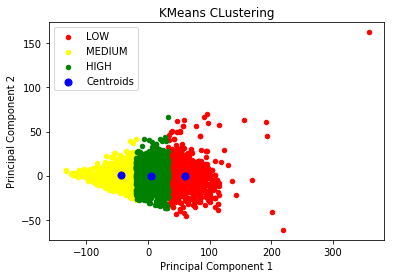

In [56]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(principalDf[y_km_pca == 0, 0], principalDf[y_km_pca == 0, 1], s = 20, c = 'red', label = 'LOW')
plt.scatter(principalDf[y_km_pca == 1, 0], principalDf[y_km_pca == 1, 1], s = 20, c = 'yellow', label = 'MEDIUM')
plt.scatter(principalDf[y_km_pca == 2, 0], principalDf[y_km_pca == 2, 1], s = 20, c = 'green', label = 'HIGH')


#Plotting the centroids of the clusters
plt.scatter(km_pca.cluster_centers_[:, 0], km_pca.cluster_centers_[:,1], s = 50, c = 'blue', label = 'Centroids')
#print (df.columns)
plt.title('KMeans CLustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend()
plt.show()

In [57]:
# from sklearn import metrics
# #test_x = [[ 6.2,0.45,0.26,4.4,0.063,63.0,206.0,0.994,3.27,0.52,9.8]] #8
# test_x = [[ 6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5]]#8
# # test_x = [[ 7.4,0.27,0.48,1.1,0.047,17,132,0.9914,3.19,0.49,11.6]] #6
# # test_x = [[ 5.8,0.24,0.44,3.5,0.029,5,109,0.9913,3.53,0.43,11.7]] #3
# pca_x = pca.transform(test_x)
# print(pca_x)
# prediction=km_pca.predict( pca_x )   
# if prediction == 0 :
#     print("LOW")
# elif prediction == 1:
#     print("MEDIUM")
# else : print("HIGH") 



#  Agglomerative Clustering
To visualize the hierarchy, we are using the linkage and dendogram function from scipy (not scikit-learn) 

In [58]:
# from sklearn.preprocessing import normalize
# data_scaled = normalize(principalDf)
# data_scaled = pd.DataFrame(data_scaled, columns=principalDf.values)
# data_scaled.head()
scaled_x = StandardScaler().fit_transform(pca_x)


The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 47 and cut the dendrogram:

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(scaled_x, 'ward')

# set cut-off to 150 cluster merges
max_d = 45          # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('WineQuality Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

Thereshold = 47, 3 clusters. This is same as the finding from k-means clustering.

In [60]:
y = df['target'].values

In [61]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3)
y_agglomerative = agglomerative.fit_predict(principalDf);


Text(0, 0.5, 'Principal Component 2')

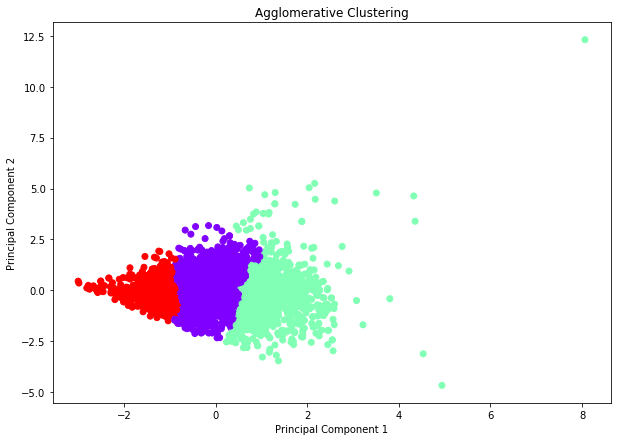

In [62]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_x[:,0], scaled_x[:,1], c=agglomerative.labels_, cmap='rainbow')  

plt.title('Agglomerative Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# DBSCAN

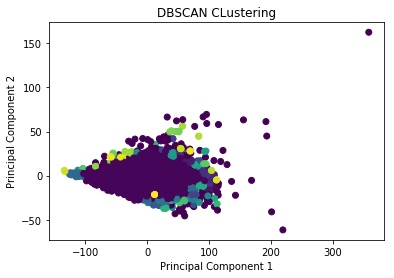

In [106]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_x)

# cluster the data
dbscan = DBSCAN(eps=0.123, min_samples = 2)
y_dbscan1 = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_dbscan1)
plt.title('DBSCAN CLustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

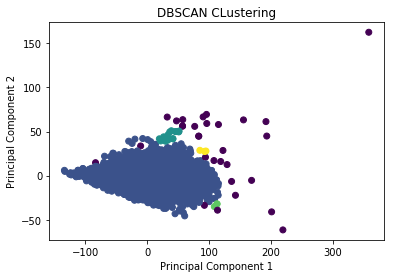

In [129]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_x)

# cluster the data
dbscan = DBSCAN(eps=0.3, min_samples = 3)
y_dbscan2 = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_dbscan2)
plt.title('DBSCAN CLustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

## Evaluation

**Evaluation For KMeans Clustering With PCA**

In [123]:
n_clusters_ = len(set(y_km_pca)) - (1 if -1 in y_km_pca else 0)
n_noise_ = list(y_km_pca).count(-1)

In [124]:
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_km_pca))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_km_pca))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_km_pca))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_km_pca))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_km_pca))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_km_pca))

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.032
Completeness: 0.032
V-measure: 0.032
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.031


/Users/hninnwe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.411


**Evaluation for KMeans Clustering Without PCA**

In [125]:
n_clusters_ = len(set(y_km)) - (1 if -1 in y_km else 0)
n_noise_ = list(y_km).count(-1)

In [126]:
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_km))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_km))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_km))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_km))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_km))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_km))

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.031
Completeness: 0.032
V-measure: 0.031
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.411


/Users/hninnwe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**Evaluation for Agglomerative Clustering**

In [68]:
n_clusters_ = len(set(y_agglomerative)) - (1 if -1 in y_agglomerative else 0)
n_noise_ = list(y_agglomerative).count(-1)

In [69]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_agglomerative))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_agglomerative))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_agglomerative))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_agglomerative))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y,   ))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_agglomerative))

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.030
Completeness: 0.032
V-measure: 0.031
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.030


/Users/hninnwe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.392


**Evaluation for DBSCAN Clustering(eps=0.123, min_samples = 2)**

In [108]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_dbscan1)) - (1 if -1 in y_dbscan1 else 0)
n_noise_ = list(y_dbscan1).count(-1)

In [109]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_dbscan1))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_dbscan1))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_dbscan1))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_dbscan1))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_dbscan1))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_dbscan1))

Estimated number of clusters: 67
Estimated number of noise points: 99
Homogeneity: 0.036
Completeness: 0.056
V-measure: 0.044
Adjusted Rand Index: -0.010
Adjusted Mutual Information: 0.017


/Users/hninnwe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: -0.502


**DBSCAN Clustering(eps=0.5, min_samples = 3)**

In [130]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_dbscan2)) - (1 if -1 in y_dbscan2 else 0)
n_noise_ = list(y_dbscan2).count(-1)

In [131]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_dbscan2))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_dbscan2))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_dbscan2))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_dbscan2))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_dbscan2))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_dbscan2))

Estimated number of clusters: 4
Estimated number of noise points: 30
Homogeneity: 0.002
Completeness: 0.028
V-measure: 0.004
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.001


/Users/hninnwe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.167
